Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.739660437
Epoch: 0002, Cost: 1.102295995
Epoch: 0003, Cost: 0.882884632
Epoch: 0004, Cost: 0.776077781
Epoch: 0005, Cost: 0.708516446
Epoch: 0006, Cost: 0.659539045
Epoch: 0007, Cost: 0.622425692
Epoch: 0008, Cost: 0.592542699
Epoch: 0009, Cost: 0.567458949
Epoch: 0010, Cost: 0.546550680
Epoch: 0011, Cost: 0.528624680
Epoch: 0012, Cost: 0.512975759
Epoch: 0013, Cost: 0.499199875
Epoch: 0014, Cost: 0.486391896
Epoch: 0015, Cost: 0.475145235
Learning finished
Accuracy:  0.889
Label:  [2]
Prediction:  [2]


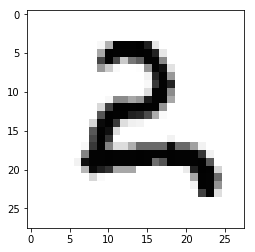

'\nEpoch: 0001, Cost: 2.826302672\nEpoch: 0002, Cost: 1.061668952\nEpoch: 0003, Cost: 0.838061315\nEpoch: 0004, Cost: 0.733232745\nEpoch: 0005, Cost: 0.669279885\nEpoch: 0006, Cost: 0.624611836\nEpoch: 0007, Cost: 0.591160344\nEpoch: 0008, Cost: 0.563868987\nEpoch: 0009, Cost: 0.541745171\nEpoch: 0010, Cost: 0.522673578\nEpoch: 0011, Cost: 0.506782325\nEpoch: 0012, Cost: 0.492447643\nEpoch: 0013, Cost: 0.479955837\nEpoch: 0014, Cost: 0.468893674\nEpoch: 0015, Cost: 0.458703488\nLearning finished\nAccuracy:  0.8951\n'

In [6]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import matplotlib.pyplot as plt
import random
%matplotlib inline

tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 15  # epoch = one forward pass and one backward pass of "all" training examples
batch_size = 100 # batch size = the number of training xamples in one forward/backward pass. 
# The higher the batch size, the more memory space you'll need
num_iterations = int(mnist.train.num_examples / batch_size)
# number of iterations = number of passes, each pass using [batch size] number of examples. 
# To be clear, one pass = one forward pass + one backward pass 
# (we do not count the forward pass and backward pass as two different passes)
# If you have 1000 trainingexamples, and your batch size is 500, ten it will take 2 iterations to complete 1 epoch.

# 배치를 정해서 하는, 노멀한 학습 방법
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval( # Tensor에 .eval 붙여서 평가
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1))) # argmax를 통해서 one-hot으로 되어 있으니, label 무엇인지 
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()


'''
Epoch: 0001, Cost: 2.826302672
Epoch: 0002, Cost: 1.061668952
Epoch: 0003, Cost: 0.838061315
Epoch: 0004, Cost: 0.733232745
Epoch: 0005, Cost: 0.669279885
Epoch: 0006, Cost: 0.624611836
Epoch: 0007, Cost: 0.591160344
Epoch: 0008, Cost: 0.563868987
Epoch: 0009, Cost: 0.541745171
Epoch: 0010, Cost: 0.522673578
Epoch: 0011, Cost: 0.506782325
Epoch: 0012, Cost: 0.492447643
Epoch: 0013, Cost: 0.479955837
Epoch: 0014, Cost: 0.468893674
Epoch: 0015, Cost: 0.458703488
Learning finished
Accuracy:  0.8951
'''
